In [11]:
#import tensorflow as tf
#import tensorflow.keras as K
from tensorflow.keras.applications.xception import Xception

import keras
#from tensorflow.keras import layers, models
#from keras.preprocessing.image import ImageDataGenerator
#import numpy as np

import time
from datetime import timedelta

#import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
#from tensorflow.data import Dataset

from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm

from util_functions import *

In [2]:
DATA_PATH = "../../Data/"
IMG_SIZE = (224, 224)
#IMAGES_PATH_SEPARATED = DATA_PATH+"HAM10000_images_separated_colored_RGB/"
#IMAGES_PATH_SEPARATED = DATA_PATH+"HAM10000_images_separated"

IMAGES_PATH_VALIDATION = DATA_PATH+"HAM10000_images_separated_validation/"

In [8]:
# NOT TESTED
from keras.utils.vis_utils import plot_model
plot_model(model_loaded, to_file="output/Original-Original.png")

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## TEST RESULTS

In [7]:
# generate all the model names with augmentations and kfold numbers
start = "skin_classifier_10_"
models = ["BASIC_", "VGG16_"]
augmentations = ["original_","rotation_","zoom_","crop+flip_","color_"]
kfolds = ["kfold_1", "kfold_2", "kfold_3", "kfold_4", "kfold_5", ]
end = ".keras"

paths = []
for m in models:
    for aug in augmentations:
        for kfold in kfolds:
            paths.append(start+m+aug+kfold+end)
paths

['skin_classifier_10_BASIC_original_kfold_1.keras',
 'skin_classifier_10_BASIC_original_kfold_2.keras',
 'skin_classifier_10_BASIC_original_kfold_3.keras',
 'skin_classifier_10_BASIC_original_kfold_4.keras',
 'skin_classifier_10_BASIC_original_kfold_5.keras',
 'skin_classifier_10_BASIC_rotation_kfold_1.keras',
 'skin_classifier_10_BASIC_rotation_kfold_2.keras',
 'skin_classifier_10_BASIC_rotation_kfold_3.keras',
 'skin_classifier_10_BASIC_rotation_kfold_4.keras',
 'skin_classifier_10_BASIC_rotation_kfold_5.keras',
 'skin_classifier_10_BASIC_zoom_kfold_1.keras',
 'skin_classifier_10_BASIC_zoom_kfold_2.keras',
 'skin_classifier_10_BASIC_zoom_kfold_3.keras',
 'skin_classifier_10_BASIC_zoom_kfold_4.keras',
 'skin_classifier_10_BASIC_zoom_kfold_5.keras',
 'skin_classifier_10_BASIC_crop+flip_kfold_1.keras',
 'skin_classifier_10_BASIC_crop+flip_kfold_2.keras',
 'skin_classifier_10_BASIC_crop+flip_kfold_3.keras',
 'skin_classifier_10_BASIC_crop+flip_kfold_4.keras',
 'skin_classifier_10_BASIC_c

In [15]:
# Gather results
generator = ImageDataGenerator()
validation_data = generator.flow_from_directory( 
        directory=IMAGES_PATH_VALIDATION,
        target_size=IMG_SIZE,
        batch_size=64
)
y_real = to_categorical(validation_data.labels)

def get_stats(path):
    model_loaded = keras.models.load_model("output/keras_models/"+path)
    y_pred = model_loaded.predict(validation_data)
    cm = print_confusion_matrix(model_loaded, val_image_path=None, 
                                data=validation_data, supress_print=True)

    mean = cm.mean()
    top_1 = get_top_k_accuracy(y_real, y_pred,1)
    top_2 = get_top_k_accuracy(y_real, y_pred,2)
    top_3 = get_top_k_accuracy(y_real, y_pred,3)
    
    model = path[19:]
    model = model[:model.index("_")]
    augment = path[25:]
    augment = augment[:augment.index("_")]
    kfold = path[-7]
    row = "{},{},{},{},{},{},{},{},{},{}\n"
    
    row = row.format(model,augment,kfold,mean["precision"],mean["recall"],
               mean["specificity"],mean["f1-score"],
               top_1,top_2,top_3)
    return row

data = "model,augment,kfold,precision,recall,specificity,f1-score,top-1,top-2,top-3\n"
for path in tqdm(paths):
    data+= get_stats(path)
strio = StringIO(data)
df = pd.read_csv(strio,sep=",")
df

Found 1005 images belonging to 7 classes.


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [56:43<00:00, 68.06s/it]


,model,augment,kfold,precision,recall,specificity,f1-score,top-1,top-2,top-3
0,BASIC,original,1,0.143000,0.156171,0.832957,0.142943,0.5721,0.7035,0.8169
1,BASIC,original,2,0.131157,0.138686,0.832657,0.126243,0.5910,0.7144,0.8517
2,BASIC,original,3,0.153557,0.148300,0.839714,0.139900,0.6010,0.7453,0.8667
3,BASIC,original,4,0.138000,0.140171,0.835900,0.128157,0.5980,0.7313,0.8308
4,BASIC,original,5,0.143771,0.141029,0.830686,0.130114,0.5771,0.7423,0.8348
5,BASIC,rotation,1,0.155057,0.147557,0.803129,0.146157,0.4975,0.6378,0.7721
6,BASIC,rotation,2,0.160914,0.144857,0.808071,0.144500,0.4796,0.6279,0.7672
7,BASIC,rotation,3,0.146571,0.140743,0.824229,0.134814,0.5632,0.6935,0.8010
8,BASIC,rotation,4,0.133600,0.144814,0.815543,0.136457,0.5413,0.6945,0.8050
9,BASIC,rotation,5,0.145629,0.151571,0.813743,0.141986,0.5264,0.6637,0.7771


In [117]:
df.to_csv("output/test_results.csv")

In [19]:
df_vgg16 = df[df.model=="VGG16"]
df_basic = df[df.model=="BASIC"]

In [27]:
df_vgg16_mean = df_vgg16.groupby("augment").agg(np.mean).drop(["kfold"], axis=1)
df_vgg16_mean

,precision,recall,specificity,f1-score,top-1,top-2,top-3
augment,,,,,,,
color,0.138171,0.143377,0.856200,0.116791,0.66410,0.70528,0.76060
crop+flip,0.148017,0.154837,0.817177,0.133060,0.54806,0.66308,0.74608
original,0.147043,0.142706,0.832711,0.135437,0.58490,0.71642,0.79862
rotation,0.139669,0.141343,0.816191,0.136306,0.53074,0.64716,0.74606
zoom,0.136009,0.137837,0.809757,0.131283,0.52934,0.64100,0.73970


In [28]:
df_basic_mean = df_basic.groupby("augment").agg(np.mean).drop(["kfold"], axis=1)
df_basic_mean

,precision,recall,specificity,f1-score,top-1,top-2,top-3
augment,,,,,,,
color,0.095320,0.141666,0.855480,0.113963,0.66210,0.69212,0.70948
crop+flip,0.128734,0.133577,0.803737,0.125474,0.52200,0.62088,0.71422
original,0.141897,0.144871,0.834383,0.133471,0.58784,0.72736,0.84018
rotation,0.148354,0.145909,0.812943,0.140783,0.52160,0.66348,0.78448
zoom,0.143186,0.142797,0.776040,0.133817,0.45254,0.58090,0.68716


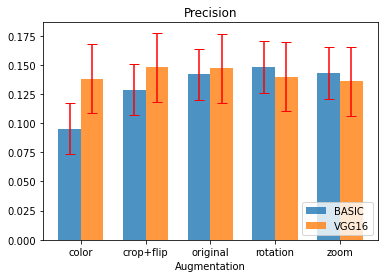

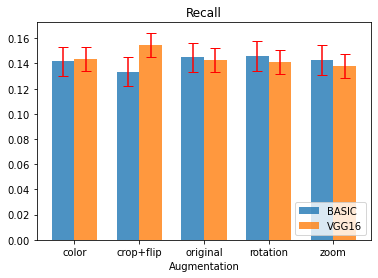

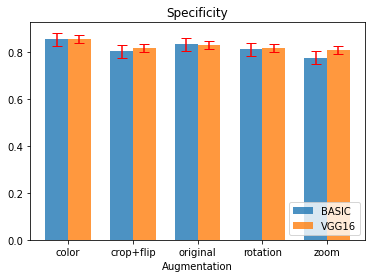

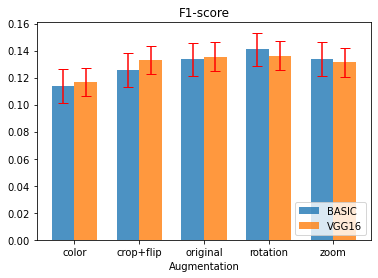

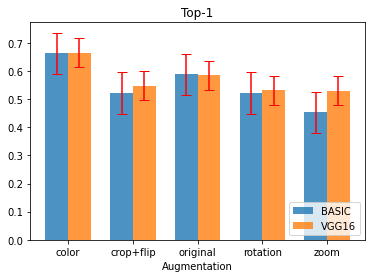

In [116]:
def plot_comparison(metric: str, print_error: bool=True):
    width = 0.35
    ind = np.arange(len(df_basic_mean.index))

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    basic_std, vgg16_std = None, None
    if print_error:
        basic_std = np.std(df_basic[metric])
        vgg16_std = np.std(df_vgg16[metric])

    ax.bar(ind, df_basic_mean[metric], width, 
           yerr=basic_std, capsize=5, alpha=0.8, ecolor="red")
    ax.bar(ind+width, df_vgg16_mean[metric], width, 
           yerr=vgg16_std, capsize=5, alpha=0.8, ecolor="red")
    ax.set_xticks(ind+width/2)
    ax.set_xticklabels( (df_basic_mean.index) )
    ax.legend( ("BASIC","VGG16"), loc="lower right")
    ax.set_xlabel("Augmentation")
    ax.set_title(metric.capitalize())
    plt.show()
    
plot_comparison("precision")
plot_comparison("recall")
plot_comparison("specificity")
plot_comparison("f1-score")
plot_comparison("top-1")